# Projet Actuariat Non-Vie

## Projet 1 : Claims Reserving

### 1) Chargement des triangles de nombres, de règlement et de SAP

Importation des librairies et initialisation des listes

In [56]:
#install.packages('xlsx')
#install.packages('ChainLadder')

library(xlsx)
library(ChainLadder)

tr <- list()

ouverturesNC <- list()
regNC <- list()
psapNC <- list()

ouvertures <- list()
reg <- list()
psap <- list()

mackOuvertures <-list()
mackReg <-list()
mackPsap <-list()

bootstrapOuvertures <-list()
bootstrapReg <-list()
bootstrapPsap <-list()

chainOuvertures <- list()
chainReg <- list()
chainPsap <- list()


Chargement de tous les triangles avec sommes cumulées (En appliquant les méthodes ChainLadder, Mack et Boostrap).

In [57]:
for( i in 1:5)
{
  tr[[i]] <- read.xlsx("Data.xlsx", sheetName = paste("Triangle",as.character(i),sep = " "),stringsAsFactors = F)
  
  ouvertures[[i]] <- as.data.frame(tr[[i]][2:11,2:11])
  reg[[i]] <- as.data.frame(tr[[i]][14:23,2:11])
  psap[[i]] <- as.data.frame(tr[[i]][26:35,2:11])
  
  colnames(ouvertures[[i]]) <- 1:10
  rownames(ouvertures[[i]]) <- 2005:2014
  
  colnames(reg[[i]]) <- 1:10
  rownames(reg[[i]]) <- 2005:2014
  
  colnames(psap[[i]]) <- 1:10
  rownames(psap[[i]]) <- 2005:2014
  
  ouvertures[[i]] <- as.matrix(ouvertures[[i]])
  reg[[i]] <- as.matrix(reg[[i]])
  psap[[i]] <- as.matrix(psap[[i]])
  
  ouvertures[[i]] <- as.triangle(ouvertures[[i]])
  reg[[i]] <- as.triangle(reg[[i]])
  psap[[i]] <- as.triangle(psap[[i]])
  
  for(j in seq(2,10))
  {
    for(k in seq(10,10-j+2))
    {
      ouvertures[[i]][j,k]=NA
      reg[[i]][j,k]=NA
      psap[[i]][j,k]=NA
    }
  }
    
  ouverturesNC[[i]] <- ouvertures[[i]]
  regNC[[i]] <- reg[[i]]
  psapNC[[i]] <- psap[[i]]
  
  ouvertures[[i]] <- incr2cum(ouvertures[[i]])
  reg[[i]] <- incr2cum(reg[[i]])
  psap[[i]] <- incr2cum(psap[[i]])
  
  chainOuvertures[[i]] <- chainladder(Triangle = ouvertures[[i]])
  chainReg[[i]] <- chainladder(Triangle = reg[[i]])
  chainPsap[[i]] <- chainladder(Triangle = psap[[i]])
  
  mackOuvertures[[i]] <- MackChainLadder(Triangle = ouvertures[[i]], est.sigma = "Mack")
  mackReg[[i]] <- MackChainLadder(Triangle = reg[[i]], est.sigma = "Mack")
  mackPsap[[i]] <- MackChainLadder(Triangle = psap[[i]], est.sigma = "Mack")
  
  bootstrapOuvertures[[i]] <- BootChainLadder(Triangle = ouvertures[[i]],R=10000)
  bootstrapReg[[i]] <- BootChainLadder(Triangle = reg[[i]],R=10000)
  bootstrapPsap[[i]] <- BootChainLadder(Triangle = psap[[i]],R=10000)
  
}

Warning message in Mack.S.E(CL[["Models"]], FullTriangle, est.sigma = est.sigma, :
"Information: essentially no variation in development data for period(s):
'8-9'"Warning message in Mack.S.E(CL[["Models"]], FullTriangle, est.sigma = est.sigma, :
"Information: essentially no variation in development data for period(s):
'6-7', '7-8', '8-9'"Warning message in Mack.S.E(CL[["Models"]], FullTriangle, est.sigma = est.sigma, :
"Information: essentially no variation in development data for period(s):
'8-9'"Warning message in Mack.S.E(CL[["Models"]], FullTriangle, est.sigma = est.sigma, :
"Information: essentially no variation in development data for period(s):
'6-7', '7-8', '8-9'"Warning message in Mack.S.E(CL[["Models"]], FullTriangle, est.sigma = est.sigma, :
"Information: essentially no variation in development data for period(s):
'8-9'"Warning message in Mack.S.E(CL[["Models"]], FullTriangle, est.sigma = est.sigma, :
"Information: essentially no variation in development data for period(s):


In [13]:
ouvertures

,1,2,3,4,5,6,7,8,9,10
2005,1330,2184,2266,2290,2294,2294,2298,2298,2298,2298
2006,1330,2204,2274,2300,2312,2312,2312,2312,2312,NA
2007,1786,3196,3358,3420,3440,3442,3444,3446,NA,NA
2008,2278,3834,4002,4048,4056,4058,4062,NA,NA,NA
2009,2568,4150,4328,4382,4390,4392,NA,NA,NA,NA
2010,2380,3864,3988,4024,4032,NA,NA,NA,NA,NA
2011,2424,3786,3970,4026,NA,NA,NA,NA,NA,NA
2012,2348,3954,4182,NA,NA,NA,NA,NA,NA,NA
2013,2464,3918,NA,NA,NA,NA,NA,NA,NA,NA
2014,1984,NA,NA,NA,NA,NA,NA,NA,NA,NA


On choisit le premier triangle

### 2) Analyse des triangles

- Triangle des ouvertures

In [58]:
ouverturesNC[[1]]

,1,2,3,4,5,6,7,8,9,10
2005,1330,854,82,24,4,0,4,0,0,0
2006,1330,874,70,26,12,0,0,0,0,NA
2007,1786,1410,162,62,20,2,2,2,NA,NA
2008,2278,1556,168,46,8,2,4,NA,NA,NA
2009,2568,1582,178,54,8,2,NA,NA,NA,NA
2010,2380,1484,124,36,8,NA,NA,NA,NA,NA
2011,2424,1362,184,56,NA,NA,NA,NA,NA,NA
2012,2348,1606,228,NA,NA,NA,NA,NA,NA,NA
2013,2464,1454,NA,NA,NA,NA,NA,NA,NA,NA
2014,1984,NA,NA,NA,NA,NA,NA,NA,NA,NA


- Triangle cumulé des ouvertures

In [3]:
ouvertures[[1]]

,1,2,3,4,5,6,7,8,9,10
2005,1330,2184,2266,2290,2294,2294,2298,2298,2298,2298
2006,1330,2204,2274,2300,2312,2312,2312,2312,2312,NA
2007,1786,3196,3358,3420,3440,3442,3444,3446,NA,NA
2008,2278,3834,4002,4048,4056,4058,4062,NA,NA,NA
2009,2568,4150,4328,4382,4390,4392,NA,NA,NA,NA
2010,2380,3864,3988,4024,4032,NA,NA,NA,NA,NA
2011,2424,3786,3970,4026,NA,NA,NA,NA,NA,NA
2012,2348,3954,4182,NA,NA,NA,NA,NA,NA,NA
2013,2464,3918,NA,NA,NA,NA,NA,NA,NA,NA
2014,1984,NA,NA,NA,NA,NA,NA,NA,NA,NA


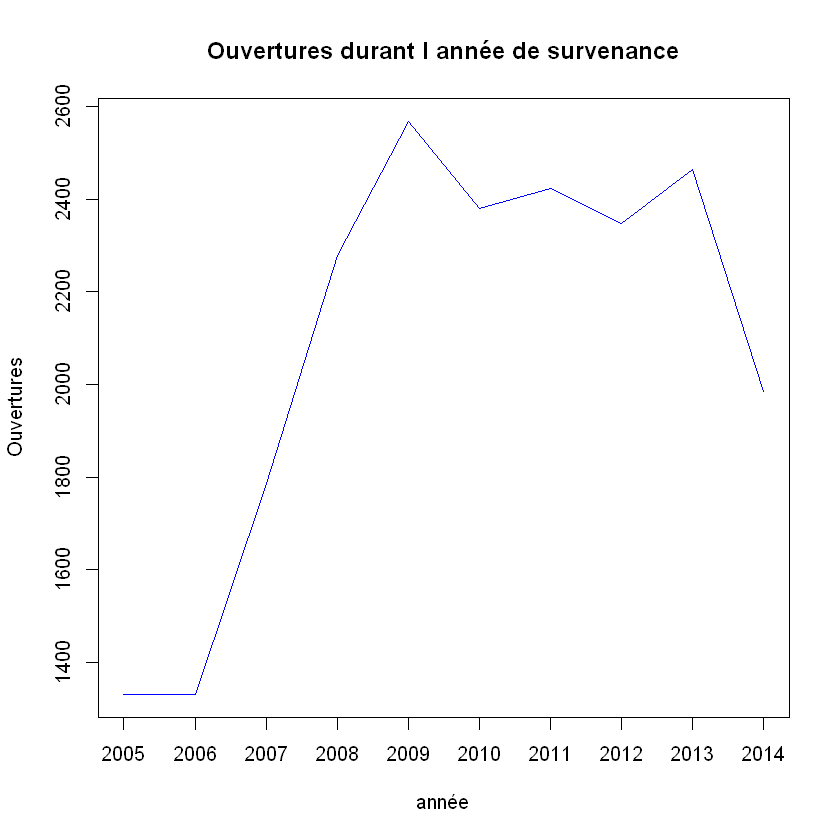

In [50]:
plot(ouvertures[[1]][,1],type='l',col='blue',ylab = 'Ouvertures',xlab='année',xaxt="n",main = 'Ouvertures durant l année de survenance')
axis(1, at=1:10, labels=2005:2014)

L'année 2009 s'annonce critique dès son achèvement en termes d'ouvertures.

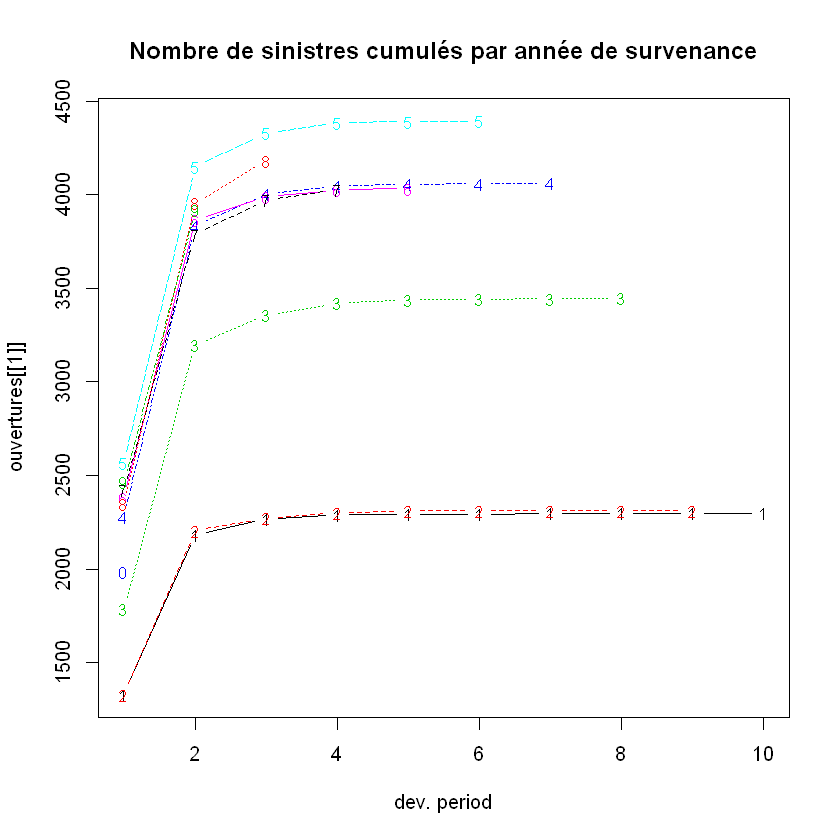

In [24]:
plot(ouvertures[[1]],main = 'Nombre de sinistres cumulés par année de survenance',cex = 0.8)

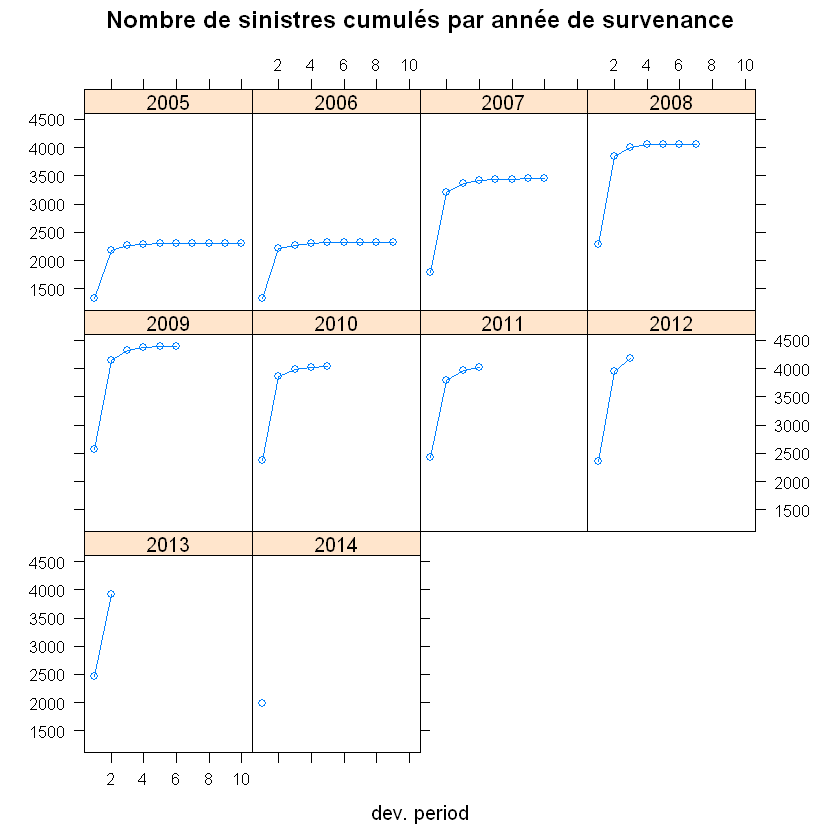

In [22]:
plot(ouvertures[[1]], lattice=TRUE, main = 'Nombre de sinistres cumulés par année de survenance')

On remarque que le **nombre de sinistres survenus durant 2005 et 2006** est nettement **inférieur que ceux survenus depuis 2007** pour enregistrer en **2009** une valeur extrême de **4392 sinistres**.

De plus, la moitié (à peu près) des sinistres survenus par année sont ouverts l'année même de la survenance. Ceci est valable pour toutes les années.<br>

<br>

- Triangle des réglements

In [59]:
regNC[[1]]

,1,2,3,4,5,6,7,8,9,10
2005,1171960.1,6604454,7247851,4476007,2140354,1315501,1500734.7,495272.2,264542.2,91392.43
2006,803251.2,3936933,7216462,5498608,2076533,2775363,749770.3,348476.6,327901.6,NA
2007,360204.7,3305002,7954925,5121387,3134808,1652229,1525123.8,688868.6,NA,NA
2008,639280.7,5118946,8945907,8464976,4141026,1430473,695915.9,NA,NA,NA
2009,1345321.2,7380489,13706351,8043920,3263113,1278109,NA,NA,NA,NA
2010,1613626.7,10069551,13520486,6380116,3886241,NA,NA,NA,NA,NA
2011,1484186.6,9634063,10671624,5886916,NA,NA,NA,NA,NA,NA
2012,2907654.8,10322393,8763518,NA,NA,NA,NA,NA,NA,NA
2013,3465668.7,9640431,NA,NA,NA,NA,NA,NA,NA,NA
2014,3619805.3,NA,NA,NA,NA,NA,NA,NA,NA,NA


- Triangle cumulé des réglements

In [4]:
reg[[1]]

,1,2,3,4,5,6,7,8,9,10
2005,1171960.1,7776414,15024265,19500271,21640625,22956126,24456861,24952133,25216675,25308068
2006,803251.2,4740185,11956646,17455255,19531788,22307151,23056921,23405397,23733299,NA
2007,360204.7,3665206,11620131,16741518,19876326,21528555,23053679,23742548,NA,NA
2008,639280.7,5758227,14704134,23169110,27310136,28740608,29436524,NA,NA,NA
2009,1345321.2,8725810,22432161,30476081,33739194,35017303,NA,NA,NA,NA
2010,1613626.7,11683178,25203664,31583780,35470021,NA,NA,NA,NA,NA
2011,1484186.6,11118250,21789874,27676791,NA,NA,NA,NA,NA,NA
2012,2907654.8,13230048,21993565,NA,NA,NA,NA,NA,NA,NA
2013,3465668.7,13106099,NA,NA,NA,NA,NA,NA,NA,NA
2014,3619805.3,NA,NA,NA,NA,NA,NA,NA,NA,NA


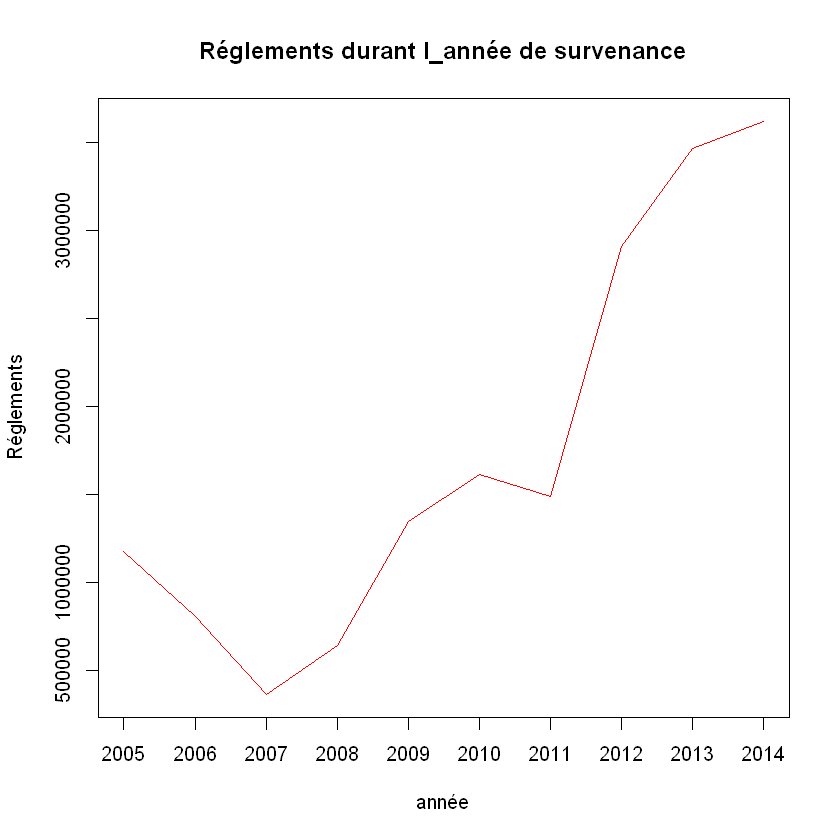

In [51]:
plot(reg[[1]][,1],type='l', col='red',ylab = 'Réglements',xlab='année',xaxt="n",main = 'Réglements durant l_année de survenance')
axis(1, at=1:10, labels=2005:2014)

Les réglements des sinistres survenus en 2014 et ouverts en 2014 s'avèrent élevés.<br>En d'autres termes les sinistres survenus en 2014 sont très coûteux.

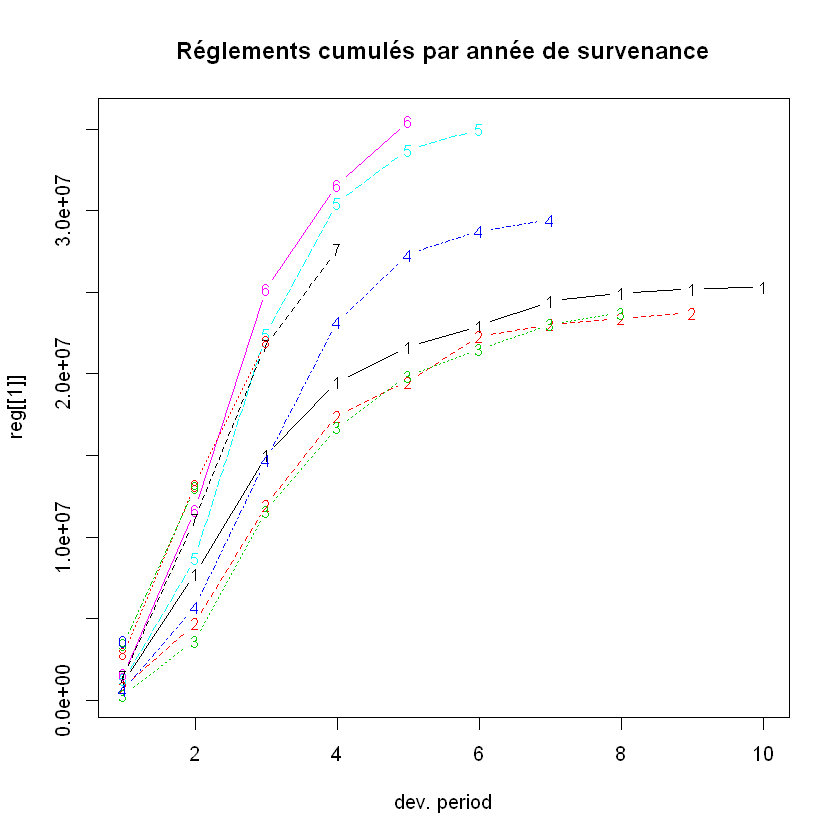

In [23]:
plot(reg[[1]], main = 'Réglements cumulés par année de survenance', cex = 0.8)

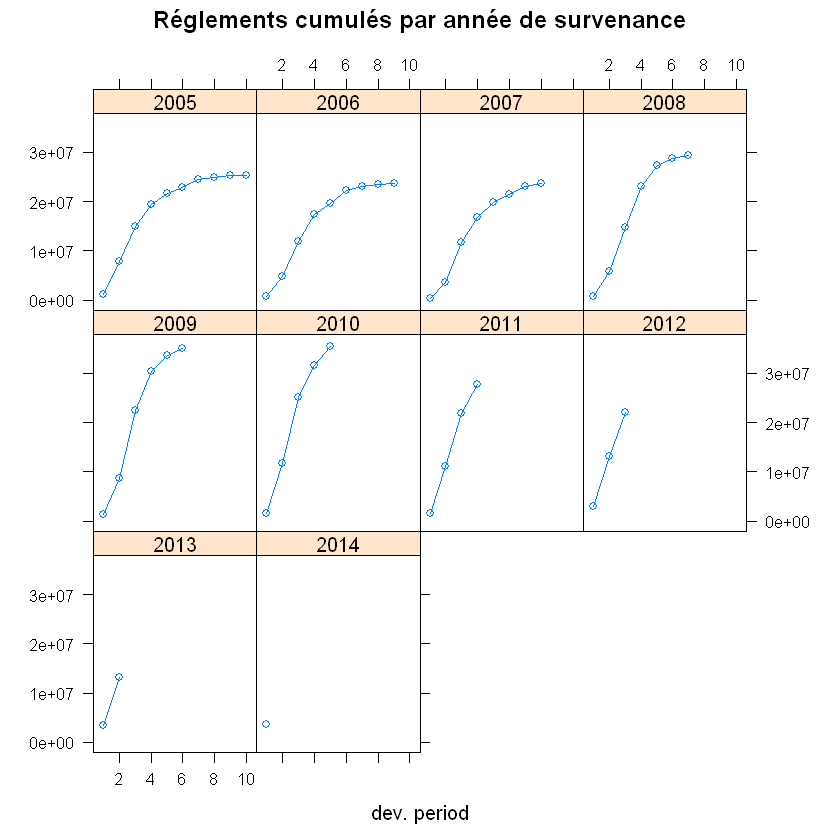

In [25]:
plot(reg[[1]], lattice=TRUE, main = 'Réglements cumulés par année de survenance', cex = 0.8)

Même si le **nombre de sinistres** survenus en 2009 est supérieur à celui de 2010 (**4392 en 2009** contre **4032 en 2010**), les **réglements des sinistres** survenus en 2010 dépassent ceux de 2009: **35,470,021 en 2010** contre **35,017,303 en 2009**.

<br>

- Triangle des PSAP

In [60]:
psapNC[[1]]

,1,2,3,4,5,6,7,8,9,10
2005,23874002,23178206,18026468,11849698,9111046,6843142,4701790,3444456,2515838,2444540
2006,22085614,28058028,20672062,14678202,11230620,6517368,5117986,3935008,3139640,NA
2007,23118624,31740206,25609466,19754562,14177400,9873226,7208260,6141802,NA,NA
2008,28120022,36959930,29915414,20552368,13302814,10257336,8593504,NA,NA,NA
2009,32313102,47994544,35683828,25996196,18725502,15631064,NA,NA,NA,NA
2010,38381884,44601906,30802126,21398782,15144404,NA,NA,NA,NA,NA
2011,37425888,44453312,31268938,22448622,NA,NA,NA,NA,NA,NA
2012,48681726,51996108,43854842,NA,NA,NA,NA,NA,NA,NA
2013,44363544,51431152,NA,NA,NA,NA,NA,NA,NA,NA
2014,39611624,NA,NA,NA,NA,NA,NA,NA,NA,NA


- Triangle cumulé des PSAP

In [5]:
psap[[1]]

,1,2,3,4,5,6,7,8,9,10
2005,23874002,47052208,65078676,76928374,86039420,92882562,97584352,101028808,103544646,105989186
2006,22085614,50143642,70815704,85493906,96724526,103241894,108359880,112294888,115434528,NA
2007,23118624,54858830,80468296,100222858,114400258,124273484,131481744,137623546,NA,NA
2008,28120022,65079952,94995366,115547734,128850548,139107884,147701388,NA,NA,NA
2009,32313102,80307646,115991474,141987670,160713172,176344236,NA,NA,NA,NA
2010,38381884,82983790,113785916,135184698,150329102,NA,NA,NA,NA,NA
2011,37425888,81879200,113148138,135596760,NA,NA,NA,NA,NA,NA
2012,48681726,100677834,144532676,NA,NA,NA,NA,NA,NA,NA
2013,44363544,95794696,NA,NA,NA,NA,NA,NA,NA,NA
2014,39611624,NA,NA,NA,NA,NA,NA,NA,NA,NA


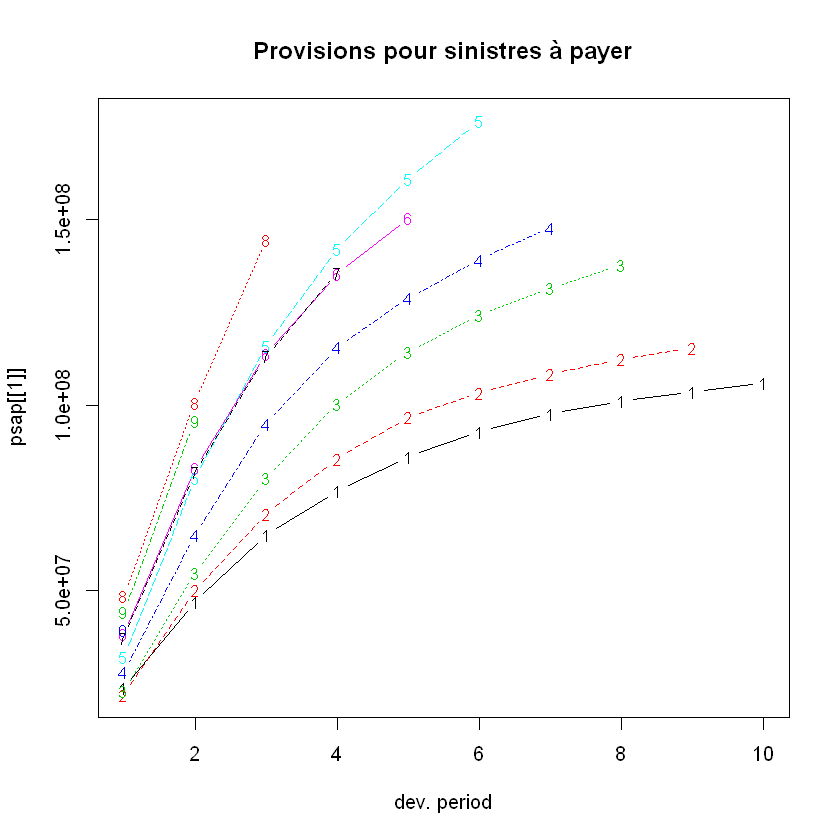

In [26]:
plot(psap[[1]], main = 'Provisions pour sinistres à payer', cex = 0.8)

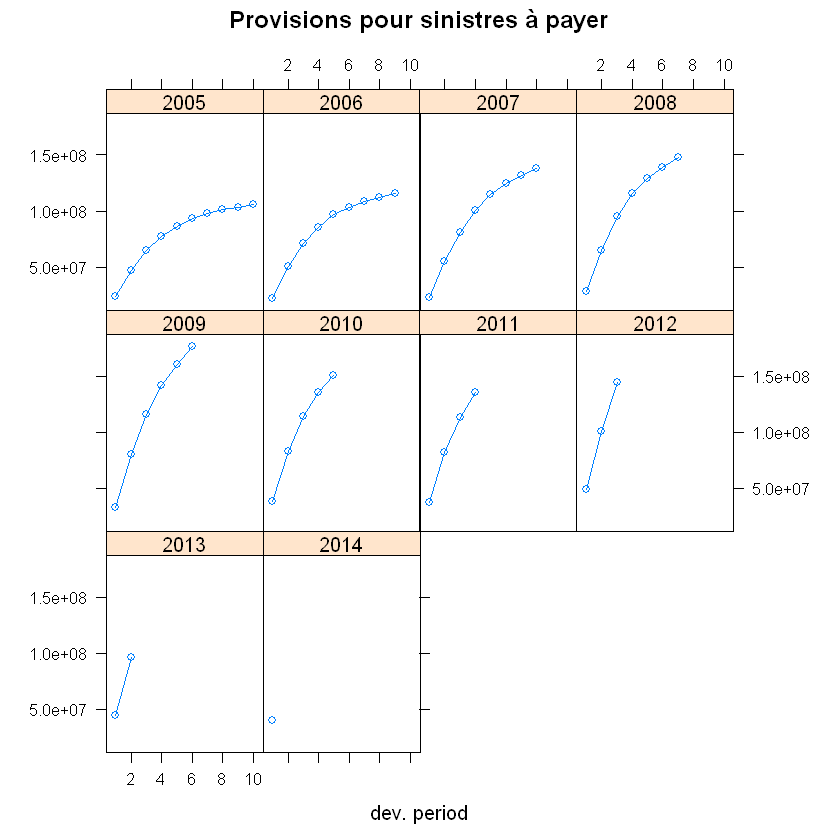

In [27]:
plot(psap[[1]], lattice=TRUE, main = 'Provisions pour sinistres à payer', cex = 0.8)

Même pour le cas des provisions pour sinistres à payer l'année **2009** présente une valeur maximale de **176,344,236**.

## 3) Interprétation

- Les années 2009 et 2010 sont critiques en ce qui concerne le nombre des sinistres survenus ainsi que la somme des réglements. Par contre les années 2005 et 2006 sont nettement moins critiques vu le nombre de sinistres relativement bas par rapport aux autres années.<br>
- Depuis 2007, on remarque une hausse d'ouvertures qui peut être liée à la croissance du nombre des clients assurés.<br>
- Le coût des sinistres survenus en 2014 est inquiétant si l'on le compare avec les réglements des années qui précèdent 2014.<br>
- Même si le nombre d'ouverture en 2014 est relativement bas, les réglements sont élevés. On peut expliquer ceci par un coût élevé par sinistre. C'est à dire le ratio Reglements/Ouvertures est très élevé par rapport aux années précédentes ce qui engendrera un PSAP élevé aussi.<br> Par conséquent, une segmentation s'avère primordiale pour mieux gérer les risques et attirer plus de clients à bas risque (plus prudents).<br>


## 4) Chain Ladder

- Chain Ladder appliqué au triangle cumulé des ouvertures

In [7]:
predict(chainOuvertures[[1]])

,1,2,3,4,5,6,7,8,9,10
2005,1330,2184.000,2266.000,2290.000,2294.000,2294.000,2298.000,2298.000,2298.000,2298.000
2006,1330,2204.000,2274.000,2300.000,2312.000,2312.000,2312.000,2312.000,2312.000,2312.000
2007,1786,3196.000,3358.000,3420.000,3440.000,3442.000,3444.000,3446.000,3446.000,3446.000
2008,2278,3834.000,4002.000,4048.000,4056.000,4058.000,4062.000,4063.009,4063.009,4063.009
2009,2568,4150.000,4328.000,4382.000,4390.000,4392.000,4395.628,4396.719,4396.719,4396.719
2010,2380,3864.000,3988.000,4024.000,4032.000,4033.467,4036.799,4037.801,4037.801,4037.801
2011,2424,3786.000,3970.000,4026.000,4037.804,4039.273,4042.610,4043.614,4043.614,4043.614
2012,2348,3954.000,4182.000,4234.565,4246.980,4248.525,4252.035,4253.091,4253.091,4253.091
2013,2464,3918.000,4090.454,4141.868,4154.012,4155.523,4158.956,4159.989,4159.989,4159.989
2014,1984,3262.247,3405.837,3448.646,3458.758,3460.016,3462.874,3463.734,3463.734,3463.734


Le nombre de sinistres ultime estimé pour 2014 (3464) est relativement faible par rapport aux années 2008-2013.

<br>

- Chain Ladder appliqué au triangle cumulé des réglements

In [53]:
predict(chainReg[[1]])

,1,2,3,4,5,6,7,8,9,10
2005,1171960.1,7776414,15024265,19500271,21640625,22956126,24456861,24952133,25216675,25308068
2006,803251.2,4740185,11956646,17455255,19531788,22307151,23056921,23405397,23733299,23819315
2007,360204.7,3665206,11620131,16741518,19876326,21528555,23053679,23742548,24033425,24120529
2008,639280.7,5758227,14704134,23169110,27310136,28740608,29436524,30075840,30444309,30554648
2009,1345321.2,8725810,22432161,30476081,33739194,35017303,36656342,37452462,37911304,38048706
2010,1613626.7,11683178,25203664,31583780,35470021,37925269,39700420,40562653,41059599,41208411
2011,1484186.6,11118250,21789874,27676791,31390658,33563531,35134525,35897593,36337386,36469083
2012,2907654.8,13230048,21993565,29855484,33861704,36205624,37900284,38723421,39197834,39339898
2013,3465668.7,13106099,28438518,38604279,43784474,46815252,49006513,50070859,50684294,50867988
2014,3619805.3,20946240,45450596,61697570,69976586,74820392,78322477,80023522,81003916,81297497


L'affirmation lors de l'analyse se confirme puisqu'on à prévu à priori que le coût des sinistres survenus en 2014 sera très élevé. 

<br>

- Chain Ladder appliqué au triangle cumulé des charges

In [54]:
predict(chainPsap[[1]])

,1,2,3,4,5,6,7,8,9,10
2005,23874002,47052208,65078676,76928374,86039420,92882562,97584352,101028808,103544646,105989186
2006,22085614,50143642,70815704,85493906,96724526,103241894,108359880,112294888,115434528,118159771
2007,23118624,54858830,80468296,100222858,114400258,124273484,131481744,137623546,141272118,144607350
2008,28120022,65079952,94995366,115547734,128850548,139107884,147701388,153620048,157692708,161415606
2009,32313102,80307646,115991474,141987670,160713172,176344236,186176997,193637444,198771015,203463712
2010,38381884,82983790,113785916,135184698,150329102,162914981,171998941,178891248,183633879,187969211
2011,37425888,81879200,113148138,135596760,152499001,165266549,174481630,181473423,186284511,190682420
2012,48681726,100677834,144532676,174725241,196504878,212956693,224830924,233840304,240039703,245706695
2013,44363544,95794696,135923013,164317038,184799284,200271082,211437977,219910677,225740784,231070199
2014,39611624,87461031,124098382,150022267,168722659,182848487,193043917,200779535,206102451,210968233


D'après les données précédentes, il serait plus convenable de calculer le **coût moyen** en se basant sur les années **2009 .. 2013**.

## 5) Nombre probable de tardifs & estimation des PSAP

In [85]:
sumOuv = 0
sumReg = 0
sumPsap = 0
for(i in 5:9)
{
    sumOuv = sumOuv + ouvertures[[1]][i,11-i]
    sumReg = sumReg + reg[[1]][i,11-i]
    sumPsap = sumPsap + psapNC[[1]][i,11-i]
}

In [92]:
CM = ceiling((sumReg + sumPsap)/sumOuv)
print(paste('Coût Moyen:',CM))

[1] "Coût Moyen: 13712"


In [91]:
ouvFullTriangle = predict(chainOuvertures[[1]])
ouvFullTriangle

,1,2,3,4,5,6,7,8,9,10
2005,1330,2184.000,2266.000,2290.000,2294.000,2294.000,2298.000,2298.000,2298.000,2298.000
2006,1330,2204.000,2274.000,2300.000,2312.000,2312.000,2312.000,2312.000,2312.000,2312.000
2007,1786,3196.000,3358.000,3420.000,3440.000,3442.000,3444.000,3446.000,3446.000,3446.000
2008,2278,3834.000,4002.000,4048.000,4056.000,4058.000,4062.000,4063.009,4063.009,4063.009
2009,2568,4150.000,4328.000,4382.000,4390.000,4392.000,4395.628,4396.719,4396.719,4396.719
2010,2380,3864.000,3988.000,4024.000,4032.000,4033.467,4036.799,4037.801,4037.801,4037.801
2011,2424,3786.000,3970.000,4026.000,4037.804,4039.273,4042.610,4043.614,4043.614,4043.614
2012,2348,3954.000,4182.000,4234.565,4246.980,4248.525,4252.035,4253.091,4253.091,4253.091
2013,2464,3918.000,4090.454,4141.868,4154.012,4155.523,4158.956,4159.989,4159.989,4159.989
2014,1984,3262.247,3405.837,3448.646,3458.758,3460.016,3462.874,3463.734,3463.734,3463.734


On détermine en premier lieu la Provision pour sinistres à payer (PSAP).<br> La
provision pour sinistres tardifs est égale à la PSAP diminuée de la charge de
sinistres connue en fin d’exercice. <br>Le nombre de sinistres peut être estimé par la méthode de Chain-Ladder
appliquée aux nombres de sinistres déclarés.

In [120]:
TotalTardifs=0
for (i in 1:10)
{
    TotalTardifs = TotalTardifs + (ouvFullTriangle[i,10] - ouvFullTriangle[i,11-i])
}
TotalTardifs = ceiling(TotalTardifs)
print(paste("Total de tardifs:",TotalTardifs))

[1] "Total de tardifs: 1822"


In [124]:
PSAPestim = TotalTardifs*CM
print(paste('Estimation des PSAP par le Coût Moyen:',format(round(as.numeric(PSAPestim), 1), nsmall=1, big.mark=",") ) )

[1] "Estimation des PSAP par le Coût Moyen: 24,983,264.0"


On va comparer ce résultat aux résultats obtenus par les méthodes Mack et Bootstrap

<br>

## 6) Mack & Bootstrap

In [25]:
mackReg[[1]]

MackChainLadder(Triangle = reg[[i]], est.sigma = "Mack")

         Latest Dev.To.Date   Ultimate       IBNR   Mack.S.E CV(IBNR)
2005 25,308,068      1.0000 25,308,068          0          0      NaN
2006 23,733,299      0.9964 23,819,315     86,016     26,429    0.307
2007 23,742,548      0.9843 24,120,529    377,982     75,579    0.200
2008 29,436,524      0.9634 30,554,648  1,118,124    252,511    0.226
2009 35,017,303      0.9203 38,048,706  3,031,403    868,343    0.286
2010 35,470,021      0.8607 41,208,411  5,738,390  1,691,732    0.295
2011 27,676,791      0.7589 36,469,083  8,792,292  1,916,223    0.218
2012 21,993,565      0.5591 39,339,898 17,346,333  3,811,911    0.220
2013 13,106,099      0.2576 50,867,988 37,761,889  9,873,001    0.261
2014  3,619,805      0.0445 81,297,497 77,677,692 22,941,580    0.295

                  Totals
Latest:   239,104,022.64
Dev:                0.61
Ultimate: 391,034,143.55
IBNR:     151,930,120.92
Mack.S.E   27,085,656.76
CV(IBNR):           0

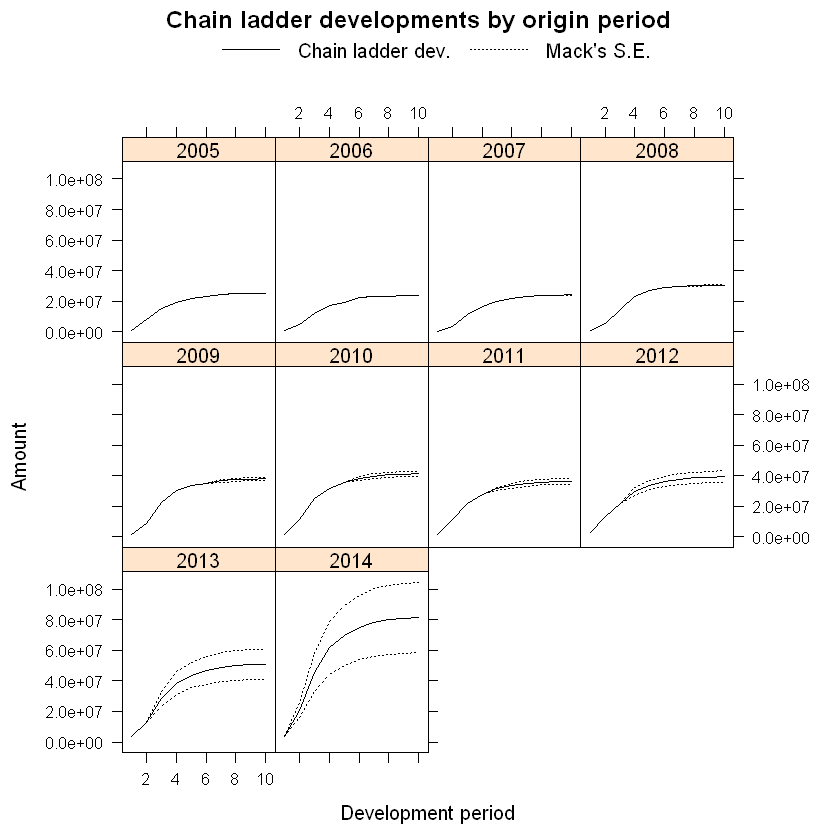

In [126]:
plot(mackReg[[1]], lattice=TRUE)

In [125]:
bootstrapReg[[1]]

BootChainLadder(Triangle = reg[[i]], R = 10000)

         Latest Mean Ultimate  Mean IBNR   IBNR.S.E   IBNR 75% IBNR 95%
2005 25,308,068    25,308,068          0          0          0 0.00e+00
2006 23,733,299    23,820,418     87,119    266,662    122,770 5.91e+05
2007 23,742,548    24,124,554    382,007    486,151    599,506 1.33e+06
2008 29,436,524    30,547,174  1,110,650    800,109  1,540,110 2.59e+06
2009 35,017,303    38,055,495  3,038,192  1,307,656  3,840,898 5.40e+06
2010 35,470,021    41,240,898  5,770,878  1,802,372  6,860,931 8.98e+06
2011 27,676,791    36,512,720  8,835,929  2,260,214 10,265,085 1.28e+07
2012 21,993,565    39,442,603 17,449,037  3,595,424 19,758,642 2.38e+07
2013 13,106,099    50,993,260 37,887,161  7,797,770 42,810,905 5.17e+07
2014  3,619,805    83,054,090 79,434,284 28,593,439 96,410,237 1.32e+08

                  Totals
Latest:         2.39e+08
Mean Ultimate:  3.93e+08
Mean IBNR:      1.54e+08
IBNR.S.E        3.16e+07
Total IBNR 75%: 1.73e+08
Total IB

In [134]:
bootstrapReg[[1]][1]

$call
BootChainLadder(Triangle = reg[[i]], R = 10000)


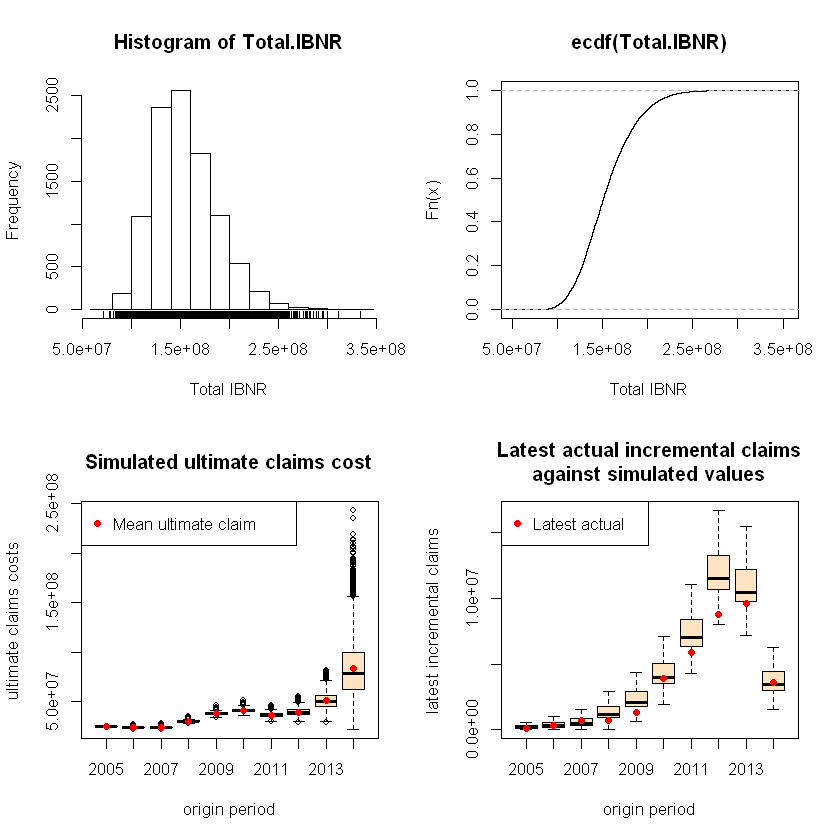

In [128]:
plot(bootstrapReg[[1]])

## 7) Interprétations

- **L'estimation des PSAP par la méthode du Coût Moyen est: 24,983,264.** <br>Cette methode est déterministe et consiste à déterminer le coût moyen par année de survenance d’un côté et le nombre de sinistre à venir de l’autre, le règlement futur est alors le produit des deux termes. <br> Le coût moyen d’un sinistre est défini comme étant le rapport entre une charge finale estimée de sinistres et un nombre de sinistres.<br><br>
- **Léstimation des PSAP par la méthode de Mack est: 27,085,656.76 en moyenne avec un Coefficient de variance CV(IBNR): 0.18**<br>Donc la méthode de Mack nous a donnée une estimation plus élevée que celle du coût moyen avec un intervalle de confiance de + ou - 18%.<br><br>
- Pour **l'estimation des PSAP par la méthode Bootstrap** on a ajouté un aléa au jeu de données pour trouver un résultat plus fiable.